In [3]:
import rdkit
from rdkit.Chem import Descriptors
from tqdm import tqdm
import pandas as pd

In [4]:
RDKIT_PROPS = {
    "1.0.0": [
        "FractionCSP3",
        "HeavyAtomCount",
        "MolLogP",
        "MolMR",
        "MolWt",
        "NHOHCount",
        "NOCount",
        "NumAliphaticCarbocycles",
        "NumAliphaticHeterocycles",
        "NumAliphaticRings",
        "NumAromaticCarbocycles",
        "NumAromaticHeterocycles",
        "NumAromaticRings",
        "NumHAcceptors",
        "NumHDonors",
        "NumHeteroatoms",
        "NumRotatableBonds",
        "NumSaturatedCarbocycles",
        "NumSaturatedHeterocycles",
        "NumSaturatedRings",
        "TPSA",
        "fr_Al_COO",
        "fr_Al_OH",
        "fr_Al_OH_noTert",
        "fr_ArN",
        "fr_Ar_COO",
        "fr_Ar_N",
        "fr_Ar_NH",
        "fr_Ar_OH",
        "fr_COO",
        "fr_COO2",
        "fr_C_O",
        "fr_C_O_noCOO",
        "fr_C_S",
        "fr_HOCCN",
        "fr_Imine",
        "fr_NH0",
        "fr_NH1",
        "fr_NH2",
        "fr_N_O",
        "fr_Ndealkylation1",
        "fr_Ndealkylation2",
        "fr_Nhpyrrole",
        "fr_SH",
        "fr_aldehyde",
        "fr_alkyl_carbamate",
        "fr_alkyl_halide",
        "fr_allylic_oxid",
        "fr_amide",
        "fr_amidine",
        "fr_aniline",
        "fr_aryl_methyl",
        "fr_azide",
        "fr_azo",
        "fr_barbitur",
        "fr_benzene",
        "fr_benzodiazepine",
        "fr_bicyclic",
        "fr_diazo",
        "fr_dihydropyridine",
        "fr_epoxide",
        "fr_ester",
        "fr_ether",
        "fr_furan",
        "fr_guanido",
        "fr_halogen",
        "fr_hdrzine",
        "fr_hdrzone",
        "fr_imidazole",
        "fr_imide",
        "fr_isocyan",
        "fr_isothiocyan",
        "fr_ketone",
        "fr_ketone_Topliss",
        "fr_lactam",
        "fr_lactone",
        "fr_methoxy",
        "fr_morpholine",
        "fr_nitrile",
        "fr_nitro",
        "fr_nitro_arom",
        "fr_nitro_arom_nonortho",
        "fr_nitroso",
        "fr_oxazole",
        "fr_oxime",
        "fr_para_hydroxylation",
        "fr_phenol",
        "fr_phenol_noOrthoHbond",
        "fr_phos_acid",
        "fr_phos_ester",
        "fr_piperdine",
        "fr_piperzine",
        "fr_priamide",
        "fr_prisulfonamd",
        "fr_pyridine",
        "fr_quatN",
        "fr_sulfide",
        "fr_sulfonamd",
        "fr_sulfone",
        "fr_term_acetylene",
        "fr_tetrazole",
        "fr_thiazole",
        "fr_thiocyan",
        "fr_thiophene",
        "fr_unbrch_alkane",
        "fr_urea",
    ]
}


CURRENT_VERSION = "1.0.0"


class Rdkit2d(object):
    def __init__(self):
        self.name = "rdkit2d"
        self.properties = RDKIT_PROPS[CURRENT_VERSION]
        self._funcs = {name: func for name, func in Descriptors.descList}

    def calc(self, mols):
        R = []
        for mol in tqdm(mols):
            r = []
            for prop in self.properties:
                r += [self._funcs[prop](mol)]
            R += [r]
        return pd.DataFrame(R, columns = self.properties)

desc = Rdkit2d()

In [6]:
from rdkit import Chem


# Analyze all series 4

mols = [Chem.MolFromSmiles(smi) for smi in list(pd.read_csv("data/raw/series4_processed.csv")["smiles"])]

In [14]:
s4 = desc.calc(mols)

100%|██████████| 387/387 [00:00<00:00, 887.39it/s]


(array([ 3.,  0.,  0.,  0.,  0.,  0.,  0.,  1., 10., 20.,  1.,  0.,  0.,
         2.,  1.,  2.,  4., 36., 48.,  4.,  0.,  0.,  3.,  1.,  4., 21.,
        44.,  4.,  4.,  2.,  0.,  3.,  5.,  2., 44.,  1.,  0.,  1.,  4.,
         1., 22.,  0.,  1.,  0.,  3.,  0.,  7.,  2.,  0.,  0.,  2.,  0.,
        11.,  0.,  2.,  1.,  2.,  1.,  0.,  3.,  0.,  1.,  1.,  7.,  0.,
         2.,  1.,  0.,  0., 14.,  0.,  1.,  0.,  2.,  0.,  6.,  1.,  1.,
         0.,  0.,  3.,  1.,  0.,  0.,  0.,  3.,  0.,  0.,  0.,  6.,  0.,
         0.,  0.,  2.,  0.,  0.,  1.,  0.,  0.,  1.]),
 array([0.    , 0.0056, 0.0112, 0.0168, 0.0224, 0.028 , 0.0336, 0.0392,
        0.0448, 0.0504, 0.056 , 0.0616, 0.0672, 0.0728, 0.0784, 0.084 ,
        0.0896, 0.0952, 0.1008, 0.1064, 0.112 , 0.1176, 0.1232, 0.1288,
        0.1344, 0.14  , 0.1456, 0.1512, 0.1568, 0.1624, 0.168 , 0.1736,
        0.1792, 0.1848, 0.1904, 0.196 , 0.2016, 0.2072, 0.2128, 0.2184,
        0.224 , 0.2296, 0.2352, 0.2408, 0.2464, 0.252 , 0.2576, 0.2632,
  

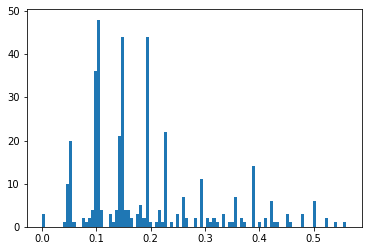

In [17]:
%matplotlib inline
import matplotlib.pyplot as plt

plt.hist(s4["FractionCSP3"],100)


(387, 106)